# Import needed packages

In [1]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import os
import copy

In [2]:
base_path = "data"

In [3]:
class DataClearning():
    def __init__(self,base_path,target_dataset_name):
        self.base_path = base_path
        self.target_dataset_name = target_dataset_name
        self.weather_data = pd.read_csv(os.path.join(base_path,self.target_dataset_name+".csv"))
        self.data = self.weather_data.copy()
        
    @staticmethod
    def _fix_index(data):
        data = data.rename(columns = {"Unnamed: 0": "timestep"})
        return data.set_index("timestep")
    @staticmethod
    def _get_columns(data):
        return data.columns.tolist()
    
    def main(self):
        return DataClearning._fix_index(self.data)
    
class PlotFeatures():
    def __init__(self,data,feature_names):
        self.data = data.copy()
        self.feature_names = feature_names
    @staticmethod    
    def _get_timeseries(data,fe):
        series = data.iloc[2000:2100][fe]
        return series
    
    def _plot(self):
        
        for i in range(len(self.feature_names)):
            plt.figure(figsize = (20,5))
            series = PlotFeatures._get_timeseries(self.data,self.feature_names[i])
            plt.grid(True)
            plt.title("The Variation of "+ self.feature_names[i] + " Over Time",fontsize = 20)
            plt.xlabel("Timesteps",fontsize = 15)
            plt.ylabel("Values",fontsize = 15)
            plt.plot(series.index.tolist(),series.values)
            plt.xticks(rotation = 90)
            plt.legend()
            plt.show()

In [4]:
dataset_name = "specific_location"
DC = DataClearning(base_path,dataset_name)
clean_weather_data = DC.main()

In [5]:
clean_weather_data.head()

,mslp(hPa),t2(C),td2(C),wind_speed(m/s),wind_dir(Deg),rh(%),GHI(W/m2),SWDIR(W/m2),SWDNI(W/m2),SWDIF(W/m2),rain(mm),AOD
timestep,,,,,,,,,,,,
2008-01-01 00:00:00,1012.751,14.887,2.606,2.669,105.078,43.686,0.0,0.0,0.0,0.0,0.0,0.098
2008-01-01 01:00:00,1012.917,14.429,3.363,2.667,106.699,47.442,0.0,0.0,0.0,0.0,0.0,0.098
2008-01-01 02:00:00,1012.966,14.580,3.778,3.341,112.426,48.357,0.0,0.0,0.0,0.0,0.0,0.098
2008-01-01 03:00:00,1013.247,14.390,3.507,3.141,102.371,48.125,0.0,0.0,0.0,0.0,0.0,0.098
2008-01-01 04:00:00,1013.083,14.388,3.869,3.607,111.300,49.295,0.0,0.0,0.0,0.0,0.0,0.098


In [6]:
variable_name = ["mslp(hPa)","td2(C)","GHI(W/m2)"]
PF = PlotFeatures(clean_weather_data,variable_name)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


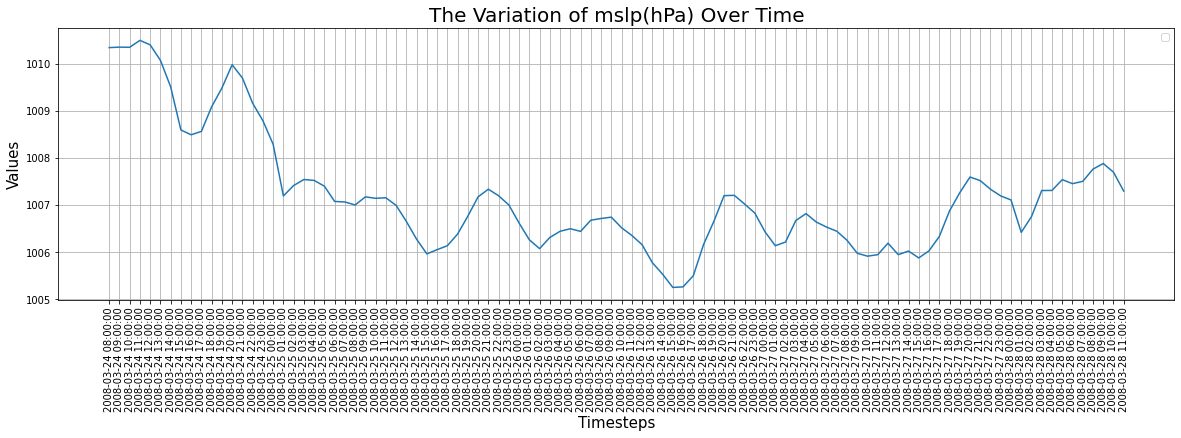

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


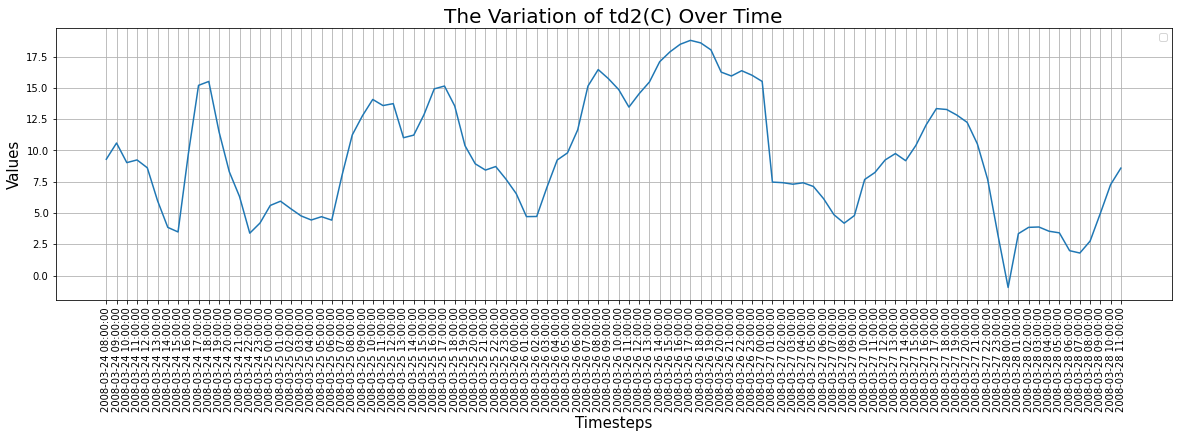

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


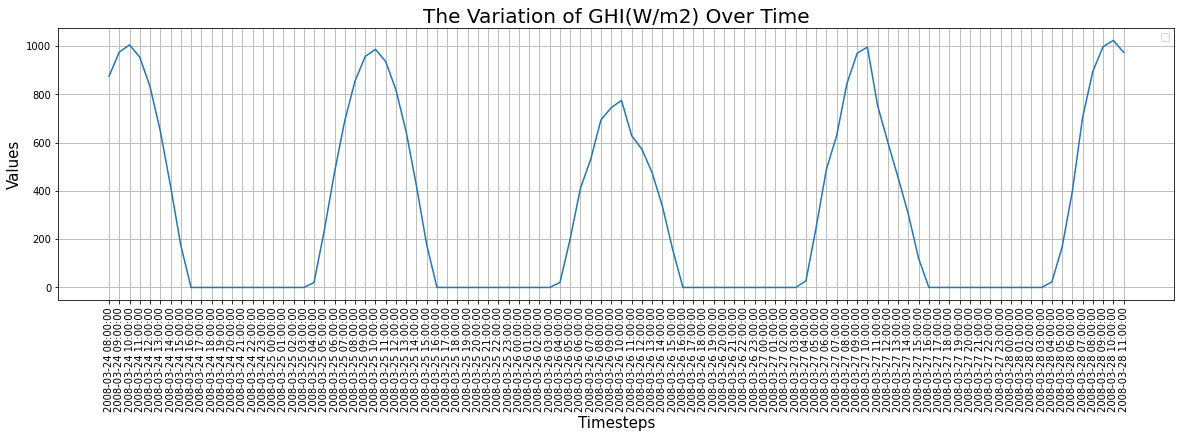

In [7]:
PF._plot()

In [8]:
clean_weather_data.iloc[1000:]["rain(mm)"].value_counts()

 0.000    93450
 0.008      116
 0.055       69
 0.032       69
 0.005       52
          ...  
 0.820        1
 0.350        1
 0.594        1
 0.458        1
-0.021        1
Name: rain(mm), Length: 647, dtype: int64

In [9]:
plt.figure(figsize = (20,8))
plt.plot(rain.index.tolist(),rain.values)

NameError: name 'rain' is not defined

<Figure size 1440x576 with 0 Axes>